In [1]:
import numpy as np
import pandas as pd
import os
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.pyplot as plt
from keras.preprocessing.image import image

Using TensorFlow backend.


In [2]:
inception_resnet_size = 299

In [3]:
def get_image(location, input_size = inception_resnet_size):
    img = imread(location)
    img = imresize(img, size = (input_size, input_size))
    img = img / 255.
    return img

In [4]:
car = 'cars_train_crop/' + os.listdir('cars_train_crop')[-1]
car

'cars_train_crop/0111_02053.jpg.jpg'

In [5]:
img = get_image(car)
img.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


(299, 299, 3)

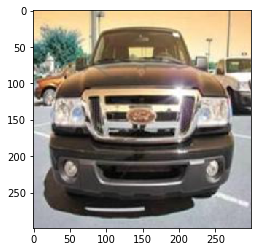

In [6]:
plt.imshow(img)
plt.show()

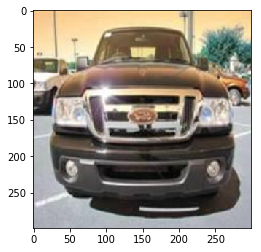

In [7]:
def random_flip(img, u=0.5):
    if np.random.random() < u:
        img = image.flip_axis(img, 1)
    return img
plt.imshow(random_flip(img, u=1.5))
plt.show()

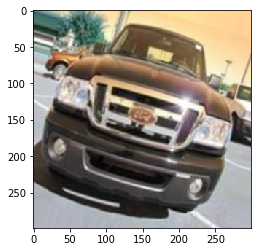

In [8]:
def rotate(x, theta, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    x = image.apply_affine_transform(x, theta = theta, channel_axis=channel_axis, 
                                     fill_mode = fill_mode, cval =cval)
    return x

def random_rotate(img, rotate_limit=(-90, 90), u=0.5):
    if np.random.random() < u:
        theta = np.random.uniform(rotate_limit[0], rotate_limit[1])
        img = rotate(img, theta)
    return img
plt.imshow(random_rotate(img, u=1.5))
plt.show()

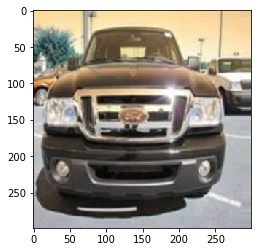

In [9]:
def random_shift(img, w_limit=(-0.1, 0.1), h_limit=(-0.1, 0.1), u=0.5):
    if np.random.random() < u:
        wshift = np.random.uniform(w_limit[0], w_limit[1])
        hshift = np.random.uniform(h_limit[0], h_limit[1])
        img = image.random_shift(img, wshift, hshift)
    return img
plt.imshow(random_shift(img, u=1.5))
plt.show()

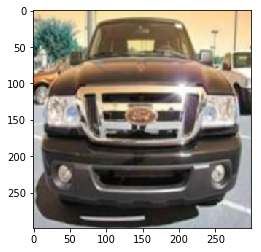

In [10]:
def random_zoom(img, zoom_range=(0.5, 1), u=0.5):
    if np.random.random() < u:
        zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
        img = image.random_zoom(img, (zx, zy), channel_axis=2)
    return img
plt.imshow(random_zoom(img, u=1.5))
plt.show()

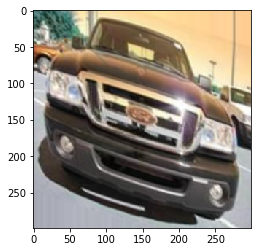

In [11]:
def random_shear(img, intensity = 55, u=0.5):
    if np.random.random() < u:
        img = image.random_shear(img, intensity, channel_axis=2)
    return img
plt.imshow(random_shear(img, u=1.5))
plt.show()

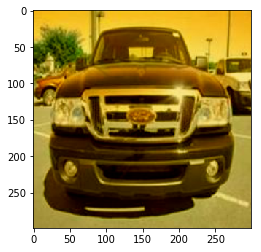

In [12]:
def random_channel_shift(x, limit, channel_axis=2):
    x = np.rollaxis(x, channel_axis, 0)
    min_x, max_x = np.min(x), np.max(x)
    channel_images = [np.clip(x_ch + np.random.uniform(-limit, limit), min_x, max_x) for x_ch in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x
plt.imshow(random_channel_shift(img, 0.5))
plt.show()

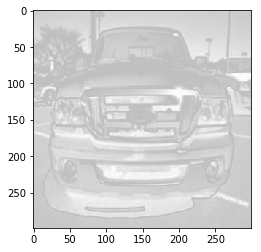

In [13]:
def random_gray(img, u=0.5):
    if np.random.random() < u:
        coef = np.array([[[0.114, 0.587, 0.299]]])  # rgb to gray (YCbCr)
        gray = np.sum(img * coef, axis=2)
        img = np.dstack((gray, gray, gray, gray))
    return img
plt.imshow(random_gray(img, 1.5))
plt.show()

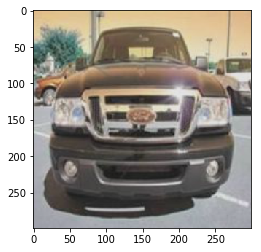

In [14]:
def random_contrast(img, limit=(-0.3, 0.3), u=0.5):
    if np.random.random() < u:
        alpha = 1.0 + np.random.uniform(limit[0], limit[1])
        coef = np.array([[[0.114, 0.587, 0.299]]])  # rgb to gray (YCbCr)
        gray = img * coef
        gray = (3.0 * (1.0 - alpha) / gray.size) * np.sum(gray)
        img = alpha * img + gray
        img = np.clip(img, 0., 1.)
    return img
plt.imshow(random_contrast(img, u=1.5))
plt.show()

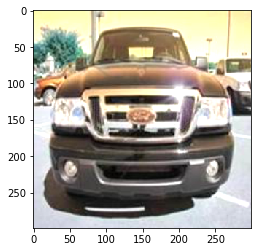

In [15]:
def random_brightness(img, limit=(-0.3, 0.3), u=0.5):
    if np.random.random() < u:
        alpha = 1.0 + np.random.uniform(limit[0], limit[1])
        img = alpha * img
        img = np.clip(img, 0., 1.)
    return img
plt.imshow(random_brightness(img, u=1.5))
plt.show()

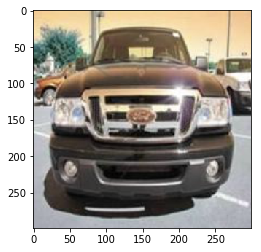

In [16]:
def random_saturation(img, limit=(-0.3, 0.3), u=0.5):
    if np.random.random() < u:
        alpha = 1.0 + np.random.uniform(limit[0], limit[1])
        coef = np.array([[[0.114, 0.587, 0.299]]])
        gray = img * coef
        gray = np.sum(gray, axis=2, keepdims=True)
        img = alpha * img + (1. - alpha) * gray
        img = np.clip(img, 0., 1.)
    return img
plt.imshow(random_saturation(img, u=1.5))
plt.show()

In [17]:
import cv2

def change_light(image, coeff):
    image = np.copy(image)
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_HLS = np.array(image_HLS, dtype = np.float64)
    image_HLS[:, :, 1] = image_HLS[:, :, 1] * coeff
    if coeff > 1:
        image_HLS[:, :, 1][image_HLS[:, :, 1] > 255] = 255
    else:
        image_HLS[:, :, 1][image_HLS[:, :, 1] < 0] = 0
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)
    return image_RGB

## Random dark

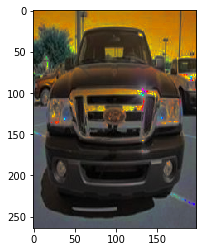

In [18]:
img = cv2.cvtColor(cv2.imread(car),cv2.COLOR_BGR2RGB)

dark_img = change_light(img, 0.5)
plt.imshow(dark_img)
plt.show()

## Random shadow

In [19]:
import random

def generate_shadow_coordinates(
    imshape, no_of_shadows, rectangular_roi, shadow_dimension
):
    vertices_list = []
    x1 = rectangular_roi[0]
    y1 = rectangular_roi[1]
    x2 = rectangular_roi[2]
    y2 = rectangular_roi[3]
    for index in range(no_of_shadows):
        vertex = []
        for dimensions in range(
            shadow_dimension
        ):
            vertex.append((random.randint(x1, x2), random.randint(y1, y2)))
        vertices = np.array(
            [vertex], dtype = np.int32
        ) 
        vertices_list.append(vertices)
    return vertices_list

def shadow_process(image, no_of_shadows, x1, y1, x2, y2, shadow_dimension):
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)  ## Conversion to HLS
    mask = np.zeros_like(image)
    imshape = image.shape
    vertices_list = generate_shadow_coordinates(
        imshape, no_of_shadows, (x1, y1, x2, y2), shadow_dimension
    )
    for vertices in vertices_list:
        cv2.fillPoly(
            mask, vertices, 255
        )
    image_HLS[:, :, 1][mask[:, :, 0] == 255] = (
        image_HLS[:, :, 1][mask[:, :, 0] == 255] * 0.5
    )
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)  ## Conversion to RGB
    return image_RGB

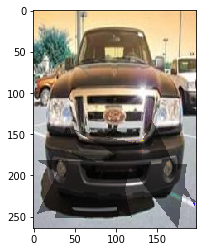

In [20]:
shadow_img = shadow_process(img,np.random.randint(1,5),
                            0,
                            img.shape[0]//2,
                            img.shape[1],
                            img.shape[0], 5)
plt.imshow(shadow_img)
plt.show()

## Random snow

In [21]:
def snow_process(image, snow_coeff):
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_HLS = np.array(image_HLS, dtype = np.float64)
    brightness_coefficient = 2.5
    imshape = image.shape
    snow_point = snow_coeff
    image_HLS[:, :, 1][image_HLS[:, :, 1] < snow_point] = (
        image_HLS[:, :, 1][image_HLS[:, :, 1] < snow_point]
        * brightness_coefficient
    )
    image_HLS[:, :, 1][
        image_HLS[:, :, 1] > 255
    ] = 255
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)  ## Conversion to RGB
    return image_RGB

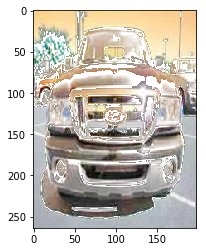

In [22]:
good_snow = 0.4 * (255 / 2) + (255 / 3)
snow_img = snow_process(img, good_snow)
plt.imshow(snow_img)
plt.show()

## Random rain

In [23]:
def generate_random_lines(imshape, slant, drop_length, rain_type):
    drops = []
    area = imshape[0] * imshape[1]
    no_of_drops = area // 600

    if rain_type.lower() == 'drizzle':
        no_of_drops = area // 770
        drop_length = 10
    elif rain_type.lower() == 'heavy':
        drop_length = 30
    elif rain_type.lower() == 'torrential':
        no_of_drops = area // 500
        drop_length = 60
    for i in range(no_of_drops):
        if slant < 0:
            x = np.random.randint(slant, imshape[1])
        else:
            x = np.random.randint(0, imshape[1] - slant)
        y = np.random.randint(0, imshape[0] - drop_length)
        drops.append((x, y))
    return drops, drop_length

def rain_process(image, slant, drop_length, drop_color, drop_width, rain_drops):
    imshape = image.shape
    image_t = image.copy()
    for rain_drop in rain_drops:
        cv2.line(
            image_t,
            (rain_drop[0], rain_drop[1]),
            (rain_drop[0] + slant, rain_drop[1] + drop_length),
            drop_color,
            drop_width,
        )
    image = cv2.blur(image_t, (7, 7))
    brightness_coefficient = 0.7
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_HLS[:, :, 1] = image_HLS[:, :, 1] * brightness_coefficient
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)
    return image_RGB

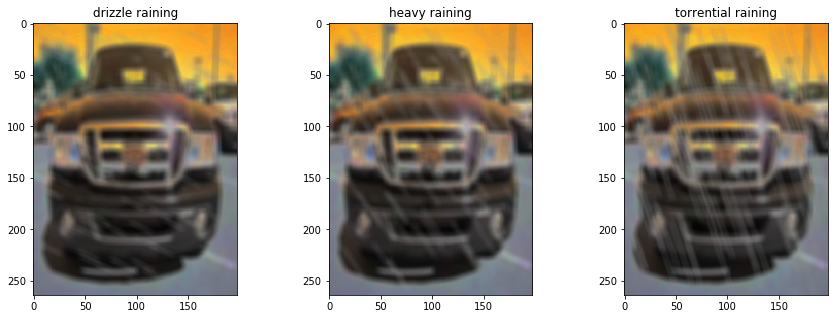

In [24]:
plt.figure(figsize=(15,5))
slant = 20
drop_length = 20
plt.subplot(1,3,1)
rain_drops,drop_length = generate_random_lines(img.shape, slant, drop_length, 'drizzle')
heavy_rain_img = rain_process(img, 20, drop_length, (200,200,200), 1, rain_drops)
plt.imshow(heavy_rain_img)
plt.title('drizzle raining')
plt.subplot(1,3,2)
rain_drops,drop_length = generate_random_lines(img.shape, slant, drop_length, 'heavy')
heavy_rain_img = rain_process(img, 20, drop_length, (200,200,200), 1, rain_drops)
plt.imshow(heavy_rain_img)
plt.title('heavy raining')
plt.subplot(1,3,3)
rain_drops,drop_length = generate_random_lines(img.shape, slant, drop_length, 'torrential')
heavy_rain_img = rain_process(img, 20, drop_length, (200,200,200), 1, rain_drops)
plt.imshow(heavy_rain_img)
plt.title('torrential raining')
plt.show()

## Random fog

In [25]:
def add_blur(image, x, y, hw, fog_coeff):
    overlay = image.copy()
    output = image.copy()
    alpha = 0.08 * fog_coeff
    rad = hw // 2
    point = (x + hw // 2, y + hw // 2)
    cv2.circle(overlay, point, int(rad), (255, 255, 255), -1)
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    return output


def generate_random_blur_coordinates(imshape, hw):
    blur_points = []
    midx = imshape[1] // 2 - 2 * hw
    midy = imshape[0] // 2 - hw
    index = 1
    while midx > -hw or midy > -hw:
        for i in range(hw // 10 * index):
            x = np.random.randint(midx, imshape[1] - midx - hw)
            y = np.random.randint(midy, imshape[0] - midy - hw)
            blur_points.append((x, y))
        midx -= 3 * hw * imshape[1] // sum(imshape)
        midy -= 3 * hw * imshape[0] // sum(imshape)
        index += 1
    return blur_points

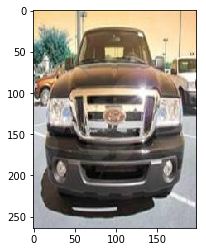

In [26]:
haze_img = img.copy()
hw = int(haze_img.shape[1] // 3 * 0.9)
haze_list = generate_random_blur_coordinates(img.shape, hw)
for haze_points in haze_list:
    haze_img = add_blur(haze_img, haze_points[0],haze_points[1], hw, 0.9) 

plt.imshow(haze_img)
plt.show()

## Add sunflare

In [27]:
def flare_source(image, point, radius, src_color):
    overlay = image.copy()
    output = image.copy()
    num_times = radius // 10
    alpha = np.linspace(0.0, 1, num = num_times)
    rad = np.linspace(1, radius, num = num_times)
    for i in range(num_times):
        cv2.circle(overlay, point, int(rad[i]), src_color, -1)
        alp = (
            alpha[num_times - i - 1]
            * alpha[num_times - i - 1]
            * alpha[num_times - i - 1]
        )
        cv2.addWeighted(overlay, alp, output, 1 - alp, 0, output)
    return output


def add_sun_flare_line(flare_center, angle, imshape):
    x = []
    y = []
    i = 0
    for rand_x in range(0, imshape[1], 10):
        rand_y = np.tan(angle) * (rand_x - flare_center[0]) + flare_center[1]
        x.append(rand_x)
        y.append(2 * flare_center[1] - rand_y)
    return x, y

def add_sun_process(
    image, no_of_flare_circles, flare_center, src_radius, x, y, src_color
):
    overlay = image.copy()
    output = image.copy()
    imshape = image.shape
    for i in range(no_of_flare_circles):
        alpha = random.uniform(0.05, 0.2)
        r = random.randint(0, len(x) - 1)
        rad = random.randint(1, imshape[0] // 80 - 2)
        cv2.circle(
            overlay,
            (int(x[r]), int(y[r])),
            rad * rad * rad,
            (
                random.randint(max(src_color[0] - 50, 0), src_color[0]),
                random.randint(max(src_color[1] - 50, 0), src_color[1]),
                random.randint(max(src_color[2] - 50, 0), src_color[2]),
            ),
            -1,
        )
        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    output = flare_source(
        output,
        (int(flare_center[0]), int(flare_center[1])),
        src_radius,
        src_color,
    )
    return output

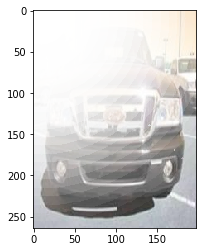

In [28]:
x, y = add_sun_flare_line((10,10), -np.pi/4, img.shape)
sun_img = add_sun_process(img, 8, (10,10), 400, x, y,(255,255,255))
plt.imshow(sun_img)
plt.show()

## Add autum

In [29]:
def autumn_process(image):
    image_t = image.copy()
    imshape = image_t.shape
    image_hls = cv2.cvtColor(image_t, cv2.COLOR_RGB2HLS)
    step = 8
    aut_colors = [1, 5, 9, 11]
    col = aut_colors[random.randint(0, 3)]
    for i in range(0, imshape[1], step):
        for j in range(0, imshape[0], step):
            avg = np.average(image_hls[j : j + step, i : i + step, 0])
            if (
                avg > 20
                and avg < 100
                and np.average(image[j : j + step, i : i + step, 1]) < 100
            ):
                image_hls[j : j + step, i : i + step, 0] = col
                image_hls[j : j + step, i : i + step, 2] = 255
    return cv2.cvtColor(image_hls, cv2.COLOR_HLS2RGB)

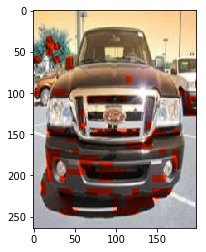

In [30]:
autumn_img = autumn_process(img)
plt.imshow(autumn_img)
plt.show()